In [28]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [19]:
df=pd.read_csv("C:\\Users\\manis\\Downloads\\archive\\spam.csv",encoding='ISO-8859-1')

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [21]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
lem=WordNetLemmatizer()

In [30]:
corpus=[]
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]'," ",df['v2'][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [26]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
cv_array=cv.fit_transform(corpus).toarray()

In [32]:
cv_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
cv.get_feature_names()

E:\anacondafiles\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aah',
 'aathi',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'absolutly',
 'abt',
 'abta',
 'aburo',
 'ac',
 'academic',
 'acc',
 'accept',
 'access',
 'accident',
 'accidentally',
 'accordingly',
 'account',
 'ache',
 'acl',
 'aco',
 'across',
 'acted',
 'action',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'address',
 'admin',
 'administrator',
 'admirer',
 'admit',
 'adore',
 'adoring',
 'adult',
 'advance',
 'adventure',
 'advice',
 'advise',
 'ae',
 'aeronautics',
 'aeroplane',
 'affair',
 'affection',
 'afraid',
 'aft',
 'afternoon',
 'aftr',
 'ag',
 'agalla',
 'age',
 'agent',
 'ago',
 'agree',
 'ah',
 'aha',
 'ahead',
 'ahmad',
 'aid',
 'aight',
 'aint',
 'air',
 'airport',
 'airtel',
 'aiya',
 'aiyah',
 'aiyar',
 'aiyo',
 'aj',
 'aka',
 'al',
 'alaipayuthe',
 'album',
 'alcohol',
 'alert',
 'alex',
 'alfie',
 'algarve',
 'ali',
 'alive',
 'allah',
 'allow',
 'allowed'

In [37]:
df2=pd.DataFrame(cv_array,columns=cv.get_feature_names())

E:\anacondafiles\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
df2.head()

,aa,aah,aathi,abi,ability,abiola,abj,able,absolutly,abt,...,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y=pd.get_dummies(df['v1'])

In [44]:
y=y.iloc[:,1]

In [54]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(cv_array,y,test_size=0.2,random_state=1)

In [47]:
from sklearn.naive_bayes import MultinomialNB
spammodel=MultinomialNB()
spammodel.fit(xtrain,ytrain)

MultinomialNB()

In [48]:
spammodel.score(xtest,ytest)

0.9847533632286996

In [49]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(spammodel.predict(xtest),ytest)

In [50]:
matrix

array([[964,   5],
       [ 12, 134]], dtype=int64)

<AxesSubplot: >

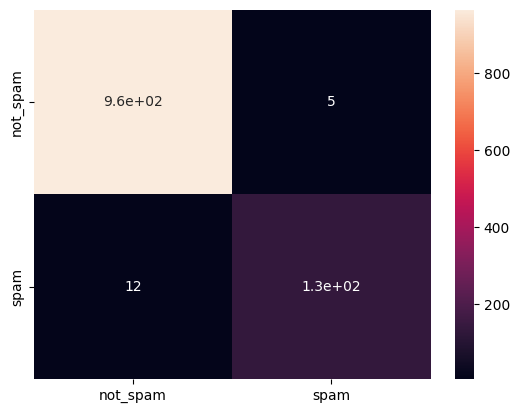

In [56]:
import seaborn as sns
sns.heatmap(matrix,annot=True,xticklabels=['not_spam','spam'],yticklabels=['not_spam','spam'])